# A Comprehensive Churna Analysis Model

# load the Libraries

In [ ]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from imblearn.combine import SMOTEENN

In [4]:
# load the dataset

df = pd.read_csv('Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 1.2 Decriptive Analysis/ Understanding the Data

In [5]:
# look through the data 
df.info()

# how many rows
print(df.shape[0])
# how many columns
print(df.shape[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
10000
14


# Understanding the Data

RowNumber: Row Numbers from 1 to 10000
CustomerId: Unique Ids for bank customer identification
Surname: Customer's last name
CreditScore: Credit score of the customer
Geography: The country from which the customer belongs
Gender: Male or Female
Age:Age of the customer
Tenure: Number of years for which the customer has been with the bank
Balance: Bank balance of the customer
NumOfProducts: Number of bank products the customer is utilising


there is 10,000 rows of data
there is 14 columns in the data set

In [6]:
# check for null values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# check for duplicate values
df.duplicated().sum()



0

we dont have any duplicated values this is good

# check for Outliers


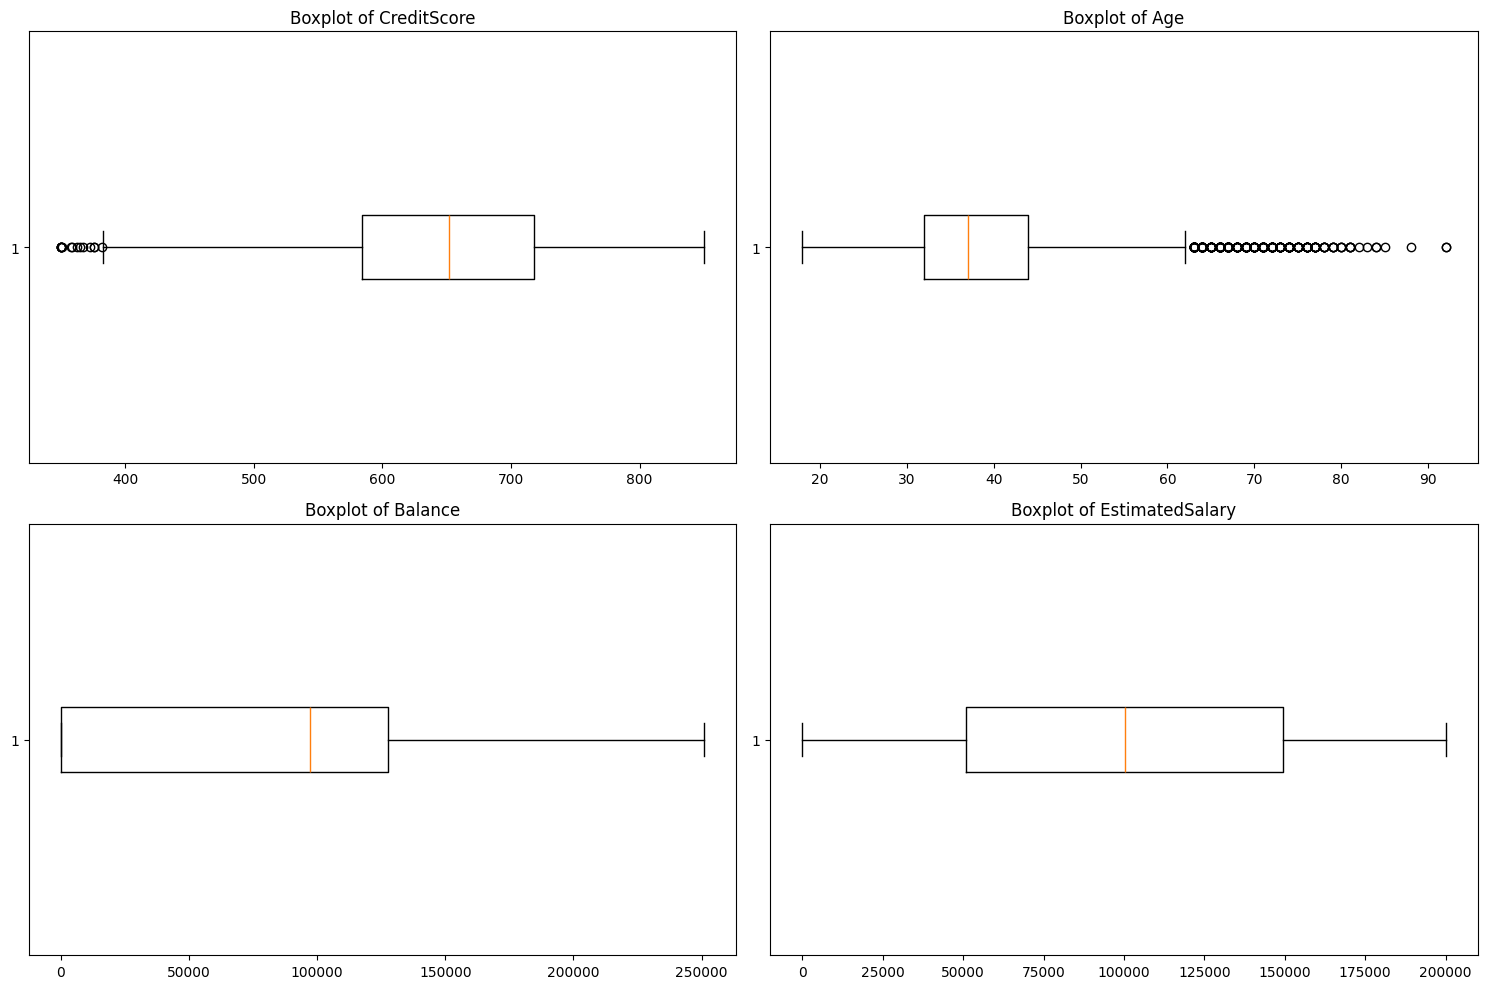

In [8]:
# feature we are checking( Numeric features)
features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Create box plots for each features outliers

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Boxplot of {feature}')
    
plt.tight_layout()
plt.show()

# 1.3 Exploratory Data Analysis

In [9]:
# check for unique vales

df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Univariate Analysis



## Credit Score

In [11]:
# Credit Score

df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

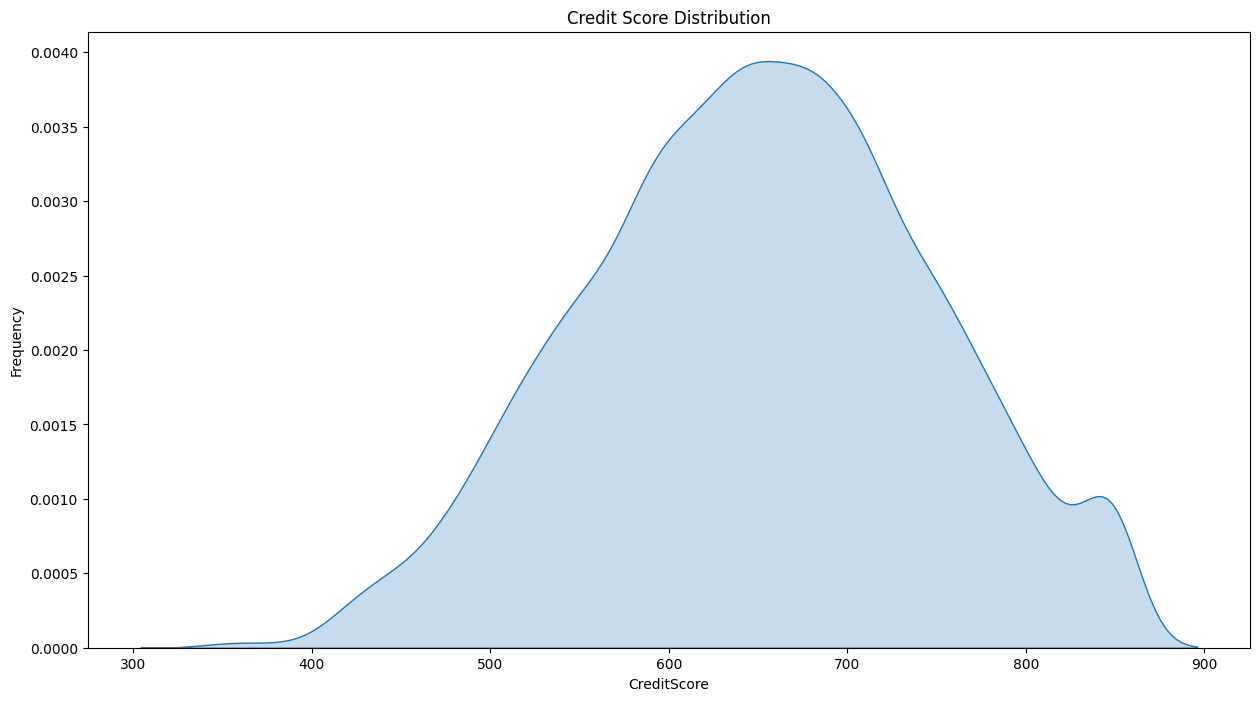

In [14]:
# plot the credit score distribution
plt.figure(figsize=(15, 8))

sns.kdeplot(df['CreditScore'],fill=True)
plt.title('Credit Score Distribution')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')

plt.show()

we can see that the distribution of credit score os skewed to the right, which means that more customer hjave a higher credit score. wich could be interpreted as most customers have a good credit history.

## Georgaphy 

In [15]:
# how many people are from each country
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

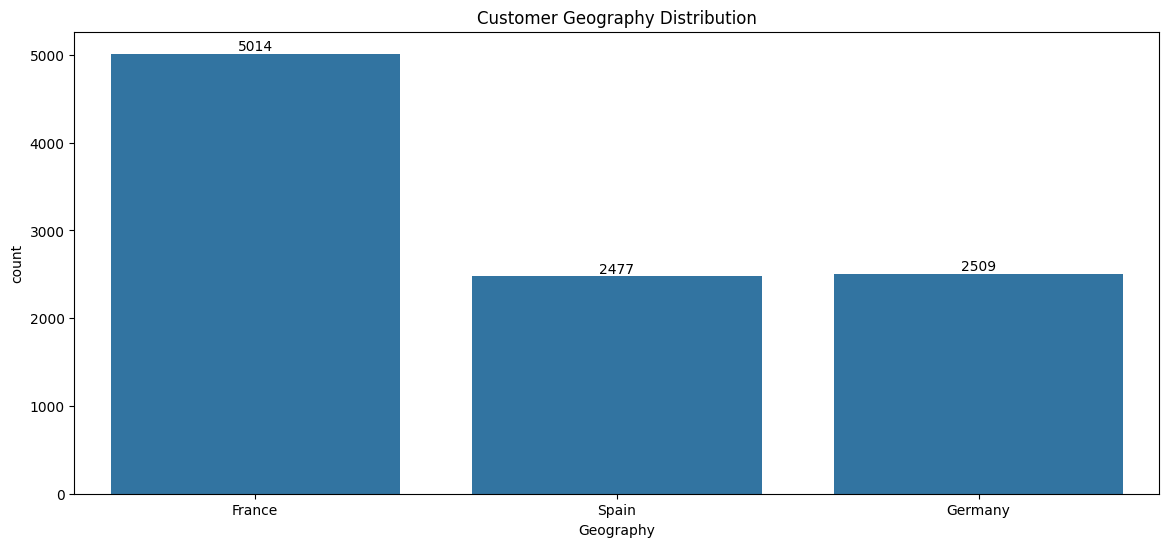

In [ ]:
# plot the distribution of geography

count = df["Geography"].value_counts()

plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x="Geography")
ax.bar_label(ax.containers[0])
plt.title("Customer Geography Distribution")
plt.show()

# Gender

In [21]:
# what is the gender distribution
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

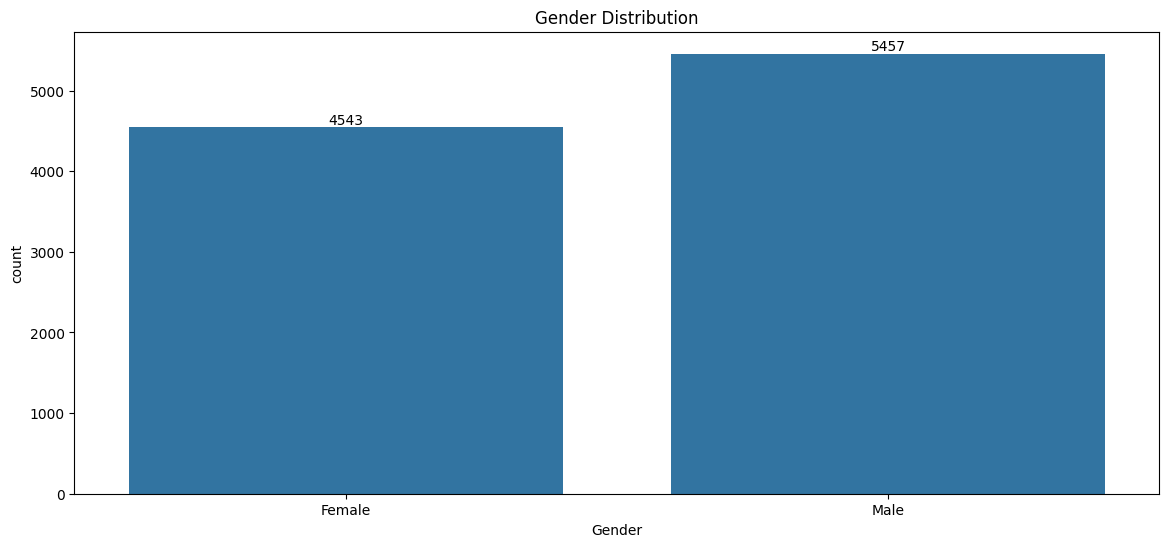

In [22]:
# plot the gender distribution

count = df["Gender"].value_counts()

plt.figure(figsize=(14,6))
ax = sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

# Age distribution

In [23]:
# age statistics

df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

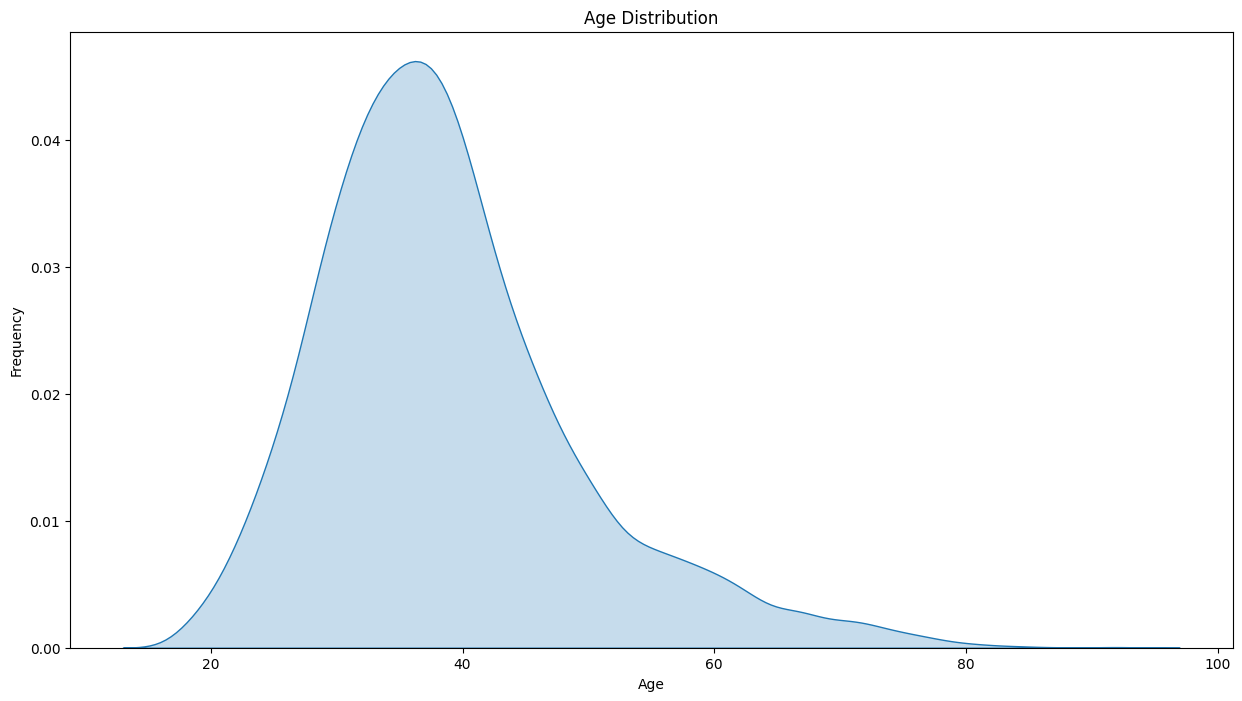

In [24]:
# plot the age diostribution

plt.figure(figsize=(15, 8))

sns.kdeplot(df['Age'], fill=True,)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

 we can see that the age is mostly concentrated aroun 30-50 , with the least customer around the older age bracket
which suggest that the banks demographic is mostly middle age

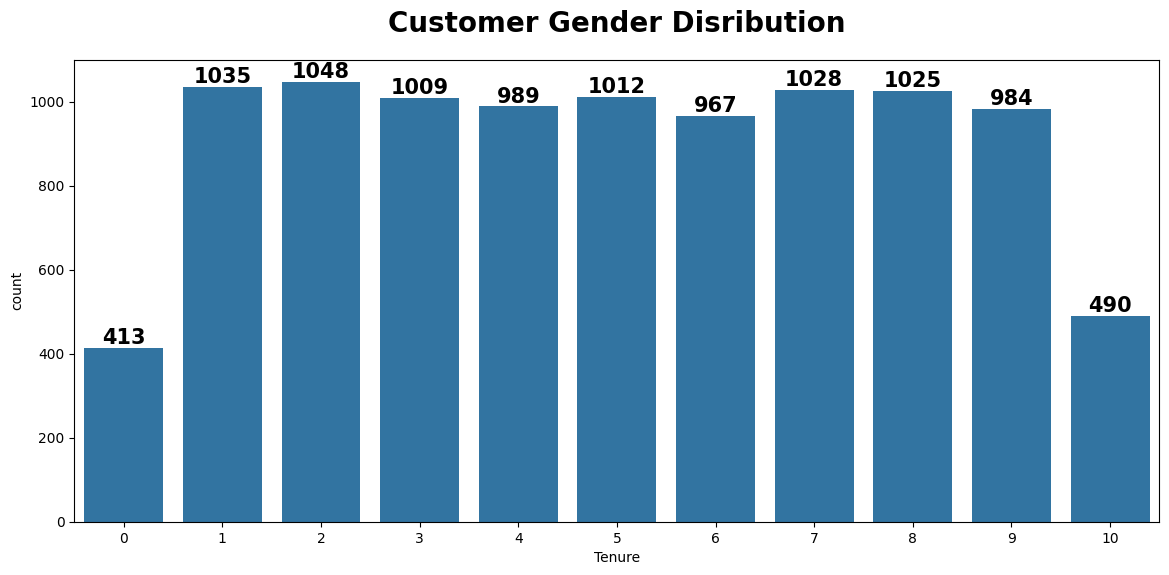

In [11]:
plt.figure(figsize=(14,6))

ax=sns.countplot(data=df, x="Tenure")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.show()


# Data Preprocessing

In [12]:
#encode the 
Label_encoder = LabelEncoder()
df['Gender'] = Label_encoder.fit_transform(df['Gender'])

df=pd.get_dummies(df,columns=['Geography'],drop_first=True)

# Feature Selection 

we only want to use features that have predictive power, columns that have no impact we can drop
we dont include the exited as a feature as it is what we are predicting

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


# Feature selection


In [14]:
# Feature selection 

# what feature have predictive ability

features =['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']

# what we are using to predict
X = df[features]

# what we are predicting
y = df['Exited']

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int32  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int32(1), int64(6)
memory usage: 683.7 KB


In [15]:
# show x
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,True


In [16]:
# show y

y.head()


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# intial feature importance


In [17]:
# find the most important feature
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
print(model.feature_importances_)

[0.12007322 0.0227643  0.23685004 0.10353268 0.12935138 0.14216129
 0.03160005 0.04553487 0.11848215 0.02836254 0.02128749]


<function matplotlib.pyplot.show(close=None, block=None)>

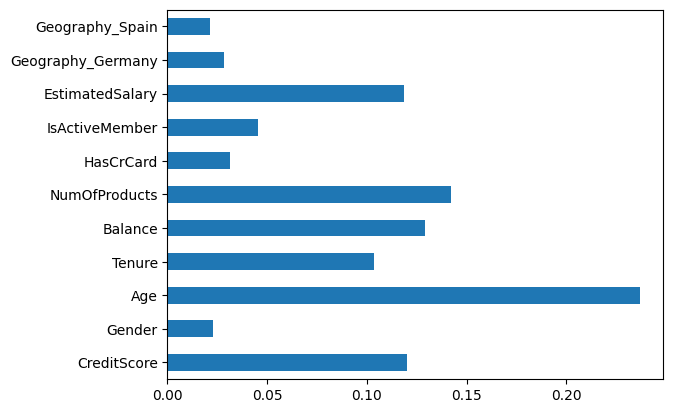

In [19]:
# plot a grapgh  of the feature importance

feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.plot(kind='barh')
plt.show

# Train Test Split

using a 80 /20 train test split

ranodm_state is 42

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y ,random_state=42) 

# scale the data using standard scaler

In [25]:
# only need to scale the  training data and test but only fit the train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply smothen after scaling, to rebalance the data only on the train data 

In [26]:
smoteenn = SMOTEENN(random_state=42)
X_train, y_train = smoteenn.fit_resample(X_train, y_train)

# Model building and Prediction using ML models


## the model i will build are
linear rgression
GradientBoostingClassifier
RANDOMK FOREST REGRESSOR
KNN CLASSIFIER

# Linear Regression Model

In [27]:
from sklearn.linear_model import LogisticRegression

# build and train a logistic regression model

log_reg = LogisticRegression(random_state= 42)
log_reg.fit(X_train,y_train)

# make the predictions
log_reg_y__pred = log_reg.predict(X_test)

# EVALUATE THE MODEL
conf_matrix_log_reg = confusion_matrix(y_test,log_reg_y__pred)
class_report_log_reg = classification_report(y_test,log_reg_y__pred)
accuracy_log_reg = accuracy_score(y_test,log_reg_y__pred)

# the model evaluations

print(conf_matrix_log_reg,class_report_log_reg,accuracy_log_reg)

[[987 606]
 [ 93 314]]               precision    recall  f1-score   support

           0       0.91      0.62      0.74      1593
           1       0.34      0.77      0.47       407

    accuracy                           0.65      2000
   macro avg       0.63      0.70      0.61      2000
weighted avg       0.80      0.65      0.68      2000
 0.6505


# chosen metrics

1. Accuracy
Definition: Accuracy is the proportion of correct predictions (both true positives and true negatives) among the total number of predictions.

Formula:

Accuracy
=
True Positives
+
True Negatives
Total Samples
Accuracy= 
Total Samples
True Positives+True Negatives
​
 
Use case: Accuracy is useful when the classes are balanced, meaning that both the positive and negative classes have roughly the same number of instances.

Limitation: Accuracy can be misleading in cases of imbalanced datasets (e.g., when one class is much more frequent than the other).

2. Precision
Definition: Precision measures the proportion of true positive predictions out of all the instances predicted as positive. It tells you how many of the predicted positives were actually positive.

Formula:

Precision
=
True Positives
True Positives
+
False Positives
Precision= 
True Positives+False Positives
True Positives
​
 
Use case: Precision is important when the cost of false positives is high. For example, in spam detection, you want to ensure that when the model predicts "spam," it is actually spam.

Limitation: A high precision alone doesn't guarantee that the model is good overall.

3. Recall (Sensitivity or True Positive Rate)
Definition: Recall measures the proportion of true positive predictions out of all actual positive instances. It tells you how many of the actual positives were correctly identified by the model.

Formula:

Recall
=
True Positives
True Positives
+
False Negatives
Recall= 
True Positives+False Negatives
True Positives
​
 
Use case: Recall is important when the cost of false negatives is high. For instance, in medical diagnosis (e.g., detecting cancer), you want to capture as many true positives as possible, even if it means having some false positives.

Limitation: A high recall alone might mean that the model is also predicting a lot of false positives.

4. F1 Score
Definition: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, especially useful when you need to balance the importance of both metrics.

Formula:

F1 Score
=
2
×
Precision
×
Recall
Precision
+
Recall
F1 Score=2× 
Precision+Recall
Precision×Recall
​
 
Use case: F1 score is commonly used when you need a balance between precision and recall, particularly in imbalanced datasets where both false positives and false negatives need to be minimized.

Limitation: While F1 score is a good balance of precision and recall, it can sometimes mask poor performance in one of the metrics, especially if there's a significant disparity between precision and recall.

Summary of Key Differences:
Accuracy is overall correctness but might be misleading with imbalanced data.

Precision focuses on minimizing false positives (i.e., ensuring predicted positives are correct).

Recall focuses on minimizing false negatives (i.e., ensuring actual positives are identified).

F1 Score balances precision and recall, useful when you care about both types of errors.

# Linear Regression Model classification report break down


# GradientBoostingClassifier Model with Randomisedsearchcv fro hyperpramater tuning

In [29]:
# import gradientboost calssifer
from sklearn.ensemble import GradientBoostingClassifier
# import the Randomisedsearchcv  search  for hypermater chosing
from sklearn.model_selection import RandomizedSearchCV


# build the model

gbm_model = GradientBoostingClassifier(random_state=42)

# define the hypepramters 

param_grid = {
       'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}


# set up the randomizedsearchcv
random_search = RandomizedSearchCV(
    estimator=gbm_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of combinations to try
    scoring='f1',  # Choose based on F1-score (since churn is classification)
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all cores
)


# fit the randomisedseacrhcv  to find the best model
random_search.fit(X_train,y_train)

#print the best pramteres
print("Best Parameters:", random_search.best_params_)

# Make predictions using the best estimator
best_gbm_model = random_search.best_estimator_
gbm_y_pred = best_gbm_model.predict(X_test)

# evalute the model
conf_matrix_gbm = confusion_matrix(y_test,gbm_y_pred)
class_report_gbm = classification_report(y_test,gbm_y_pred)
accuracy_gbm = accuracy_score(y_test,gbm_y_pred)

print(conf_matrix_gbm,class_report_gbm,accuracy_gbm)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.05}
[[1340  253]
 [ 109  298]]               precision    recall  f1-score   support

           0       0.92      0.84      0.88      1593
           1       0.54      0.73      0.62       407

    accuracy                           0.82      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.82      0.83      2000
 0.819


# Random Forest Model with Randomisedsearchcv fro hyperpramater tuning

In [30]:
# create the random froest model
randomforest_model = RandomForestClassifier(random_state=42)

# define the hyperpramtyers for the grid searcg


param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# 4. Set up RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=randomforest_model,
    param_distributions=param_grid_rf,
    n_iter=20,  # try 20 random combinations
    scoring='f1',  # f1-score because you are doing churn classification
    cv=5,        # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)


# 5. Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# 6. Best model
print("Best Parameters:", random_search_rf.best_params_)

best_rf_model = random_search_rf.best_estimator_

# 7. Predictions
randomforest_y_pred = best_rf_model.predict(X_test)

# 8. Evaluation
conf_matrix_random = confusion_matrix(y_test, randomforest_y_pred)
class_report_random = classification_report(y_test, randomforest_y_pred)
accuracy_random = accuracy_score(y_test, randomforest_y_pred)

# print results
print(conf_matrix_random,class_report_random,accuracy_random)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
[[1317  276]
 [ 112  295]]               precision    recall  f1-score   support

           0       0.92      0.83      0.87      1593
           1       0.52      0.72      0.60       407

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000
 0.806


# classification report break down

1317 ,is the true negative , the model correctly preicted the customer would nopt churn and the customer did not churn

276 false positive, type 1 error, predicted the customer would churn but they didnt churn

112 false negative, type 2 error, predicted the customer would churn but they idnt churn

295 true positive preidcted the customer would churn and they did churn


0 is no churn
1 is churn




# knn model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# Define the base KNN model (do not fit yet)
knn_model = KNeighborsClassifier()

# Define a hyperparameter search space
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],       # How to weight neighbors
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Set up RandomizedSearchCV 
random_search_knn = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_grid_knn,
    n_iter=10,                # Number of combinations to try
    scoring='f1',             # Use F1-score (good for imbalanced classification)
    cv=5,                     # 5-fold cross validation
    verbose=2,
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

# Fit RandomizedSearchCV on your training data (scaled and resampled)
random_search_knn.fit(X_train, y_train)

# Get the best parameters and estimator from the search
print("Best Parameters for KNN:", random_search_knn.best_params_)
best_knn = random_search_knn.best_estimator_

# Make predictions on the test set using the tuned model
knn_y_pred = best_knn.predict(X_test)

# Evaluate the model predictions
conf_matrix_knn = confusion_matrix(y_test, knn_y_pred)
class_report_knn = classification_report(y_test, knn_y_pred)
accuracy_knn = accuracy_score(y_test, knn_y_pred)

print(conf_matrix_knn,class_report_knn,accuracy_knn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for KNN: {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'euclidean'}
[[1114  479]
 [ 116  291]]               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1593
           1       0.38      0.71      0.49       407

    accuracy                           0.70      2000
   macro avg       0.64      0.71      0.64      2000
weighted avg       0.80      0.70      0.73      2000
 0.7025


# the best model was the Random forest model
so we will build the flask api usign it

# building a flask api on the Random forest model 

In [ ]:
# load libraries and dependcies 
import fastapi
import uvicorn
import pickle
import os

In [ ]:
# create a modle directory and save the  random forets model


os.makedirs('models', exist_ok=True)
 
with open('models/churn_analysis_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

with open('models/model_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
# Step 1: Create the folder
os.makedirs("app", exist_ok=True)

# Step 2: Create an empty __init__.py file inside it
with open("app/__init__.py", "w") as f:
    pass